Data Analytics I
Create a Linear Regression Model using Python/R to predict home
prices using Boston Housing Dataset.
(https://www.kaggle.com/c/boston-housing).
The Boston Housing dataset contains information about various
houses in Boston through different parameters. There are 506 samples
and 14 feature variables in this dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Actual path to your dataset
df = pd.read_csv('boston_housing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


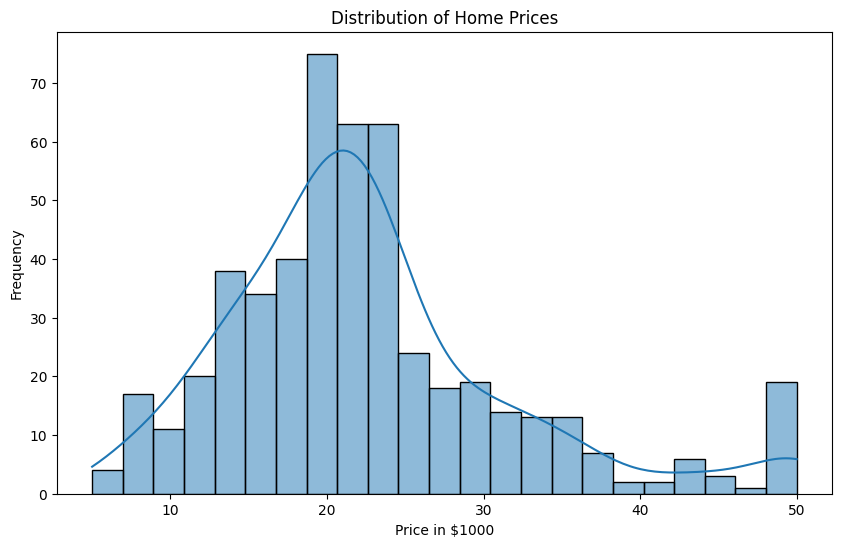

In [3]:
# Check for missing values
print(df.isnull().sum())

# Plot the distribution of the target variable (Price)
plt.figure(figsize=(10,6))
sns.histplot(df['medv'], kde=True)
plt.title('Distribution of Home Prices')
plt.xlabel('Price in $1000')
plt.ylabel('Frequency')
plt.show()

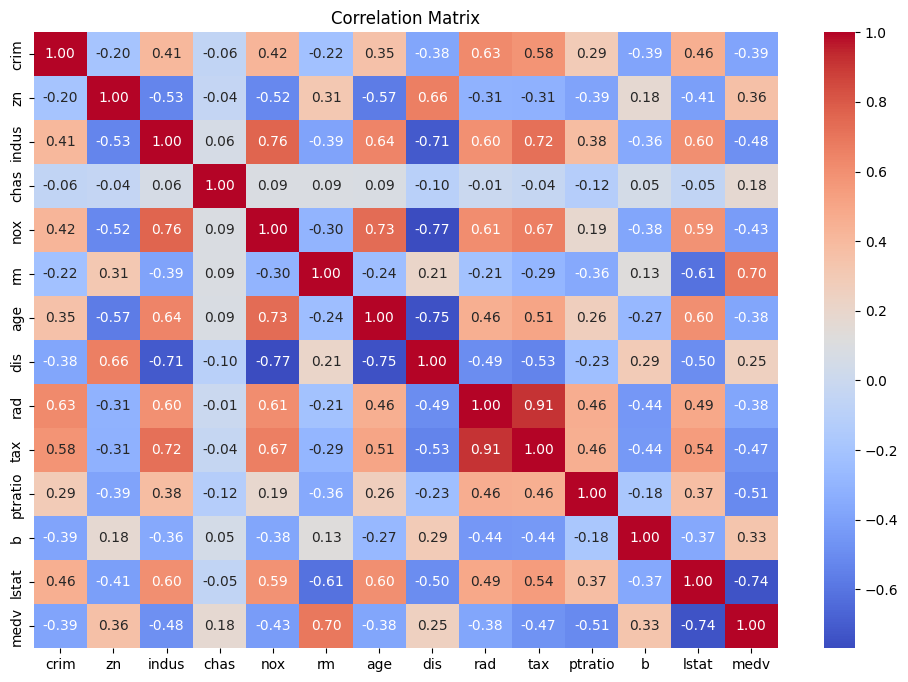

In [4]:
#  Feature Correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [29]:
# Split the data into features (X) and target (y)
X = df.drop('medv', axis=1)  # Features
y = df['medv']               # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### **Linear Regression**

- **Purpose**: Predict a continuous target variable (e.g., house price) from one or more input features (e.g., number of rooms, area).
  
- **Formula for Simple Linear Regression (1 feature)**:

  $$ Y = \beta_0 + \beta_1 X $$

  Where:
  - \( Y \) = Target variable (e.g., price)
  - \( X \) = Input feature (e.g., number of rooms)
  - \( \beta_0 \) = Intercept
  - \( \beta_1 \) = Coefficient for feature \( X \)

- **Formula for Multiple Linear Regression (multiple features)**:

  $$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n $$

  Where \( X_1, X_2, \dots, X_n \) are the features (e.g., number of rooms, area, etc.)


In [30]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [31]:
# Make Predictions
y_pred = model.predict(X_test_scaled)


### **Key Metrics for Model Evaluation**

- **R-squared (R²)**: Measures how well the model explains the variation in the target variable.

  $$ R^2 = 1 - \frac{\sum (Y_{\text{true}} - Y_{\text{pred}})^2}{\sum (Y_{\text{true}} - \bar{Y})^2} $$

  - \( R^2 \) close to 1 means the model fits the data well.

- **Root Mean Squared Error (RMSE)**: Measures the average error between actual and predicted values.

  $$ \text{RMSE} = \sqrt{\frac{1}{n} \sum (Y_{\text{true}} - Y_{\text{pred}})^2} $$

  - Lower RMSE indicates a better model.

### **Model Fitting and Prediction**

- **Fit the Model**: Estimate the coefficients (\( \beta_0, \beta_1, \dots \)) using the training data.
  
  - **Formula** for estimating coefficients:

    $$ \beta = (X^T X)^{-1} X^T Y $$

    Where \( X \) is the matrix of features and \( Y \) is the vector of target values.

- **Prediction**: Use the fitted model to predict new data points:

    $$ Y_{\text{pred}} = \beta_0 + \beta_1 X_1 + \dots $$

### **Assumptions of Linear Regression**

- **Linearity**: The relationship between the features and the target is linear.
- **Independence**: Observations are independent of each other.
- **Homoscedasticity**: Constant variance of residuals (errors).
- **Normality of Errors**: Errors should be normally distributed.

In [32]:
# Evaluate the Model
# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# R² Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Root Mean Squared Error (RMSE): 4.928602182665336
R² Score: 0.668759493535632


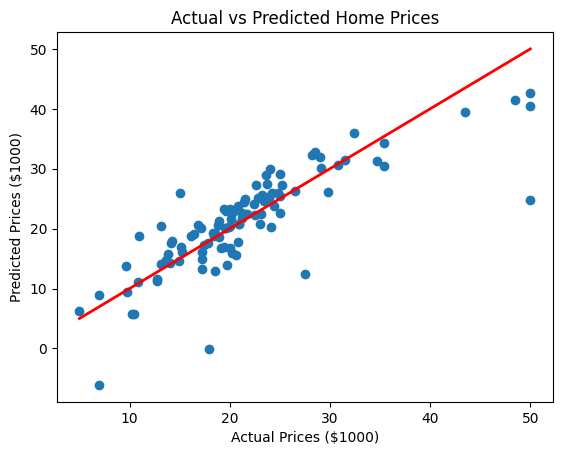

In [33]:
# Visualize Results
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Home Prices')
plt.xlabel('Actual Prices ($1000)')
plt.ylabel('Predicted Prices ($1000)')
plt.show()

In [34]:
# Print the intercept and coefficient
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: 22.796534653465343
Coefficient: [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]
